In [151]:
import json
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import normalize

In [213]:
path_to_folder = '/home/deepak/Dropbox/SJSU/Semesters/Spring2020/CMPE 255/Project/raw_msgs/testbag1_2020-05-09-19-39-52.bag/test_results/test_results_sources_1_iter8/'
result_file_name = 'test_results_sources_1_300_icp_nl.json'
f = open(path_to_folder + result_file_name)
data = json.load(f)

In [214]:
labels = ['Hatchback', 'Jeep', 'SUV', 'Sedan']
# labels = ['Jeep', 'SUV', 'Sedan']

In [215]:
# Plot confusion Matrix
predicted = []
true_label = []

for line in data:
    collect = []
    converged = []
    for test_result in data[line]:
        if test_result == 'tests':
            for label in labels:
                if (data[line][test_result][label]['has_converged']):
                    converged.append((data[line][test_result][label]['fitness_score'], label))
                collect.append((data[line][test_result][label]['fitness_score'], label))

    if len(converged) == 1:  # If only converged to 1 label
        predicted.append(converged[0][1])
        true_label.append(data[line]['true_label'])
    elif len(converged) > 1: # If converged to more than one, choose the one with lowest score
#         pass
        converged.sort()
        predicted.append(converged[0][1])
        true_label.append(data[line]['true_label'])
    else:                    # If didn't converge to any, choose the label with lowest error
        pass
#         if collect:
#             collect.sort()
#             predicted.append(collect[0][1])
#             true_label.append(data[line]['true_label'])
        
cm = confusion_matrix(true_label, predicted, labels=labels, normalize='true')
cm

array([[0.63636364, 0.25      , 0.02272727, 0.09090909],
       [0.03571429, 0.85714286, 0.10714286, 0.        ],
       [0.        , 0.2027027 , 0.74324324, 0.05405405],
       [0.26923077, 0.15384615, 0.1025641 , 0.47435897]])

In [216]:
print(len(data))
print(len(true_label))

772
252


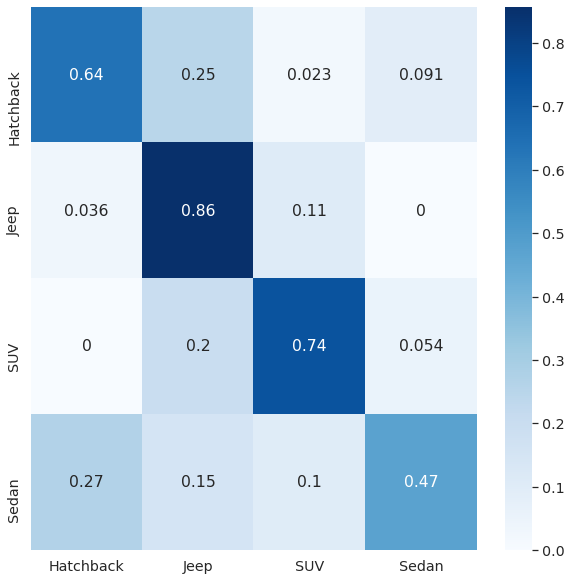

In [217]:
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                      columns = [i for i in labels])
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_cm, annot=True, cmap="Blues", ax=ax)

In [218]:
# Calculate Precision and Recall
print("recall :", recall_score(true_label, predicted, labels, average=None))
print("precision :", precision_score(true_label, predicted, labels,average=None))

recall : [0.63636364 0.85714286 0.74324324 0.47435897]
precision : [0.54901961 0.55813953 0.78571429 0.82222222]


In [ ]:
# Find correlation between num_points and failed matching
